In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
anime = pd.read_csv('anime.csv')
df = pd.read_csv('rating.csv')


In [3]:
df = pd.merge(df,anime.drop('rating',axis=1),on='anime_id')

In [4]:
df.head()

,user_id,anime_id,rating,name,genre,type,episodes,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297


In [5]:
df.groupby('name')['rating'].mean().sort_values(ascending=False).head(10)

name
Choegang Top Plate                                                  10.000000
STAR BEAT!: Hoshi no Kodou                                          10.000000
Shiroi Zou                                                          10.000000
Warui no wo Taose!! Salaryman Man                                   10.000000
Yakushiji Ryouko no Kaiki Jikenbo: Hamachou, Voice &amp; Fiction     9.000000
Tang Lang Bu Chan                                                    9.000000
Shiranpuri                                                           9.000000
Doukyuusei                                                           9.000000
Steins;Gate 0                                                        8.500000
Kimi no Na wa.                                                       8.297863
Name: rating, dtype: float64

# popularity based

In [6]:
df.groupby('name')['rating'].count().sort_values(ascending=False).head(10)

name
Death Note                          39340
Sword Art Online                    30583
Shingeki no Kyojin                  29584
Code Geass: Hangyaku no Lelouch     27718
Elfen Lied                          27506
Angel Beats!                        27183
Naruto                              25925
Fullmetal Alchemist                 25032
Fullmetal Alchemist: Brotherhood    24574
Toradora!                           24283
Name: rating, dtype: int64

In [7]:
ratings = pd.DataFrame(df.groupby('name')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(df.groupby('name')['rating'].count())

genre_dict = pd.DataFrame(data=anime[['name','genre']])
genre_dict.set_index('name',inplace=True)

In [8]:
ratings.head()

,rating,num of ratings
name,,
&quot;0&quot;,2.769231,26
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",0.000000,2
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,5.774936,782
&quot;Bungaku Shoujo&quot; Memoire,6.155748,809
&quot;Bungaku Shoujo&quot; Movie,6.457980,1535


(0.0, 3000.0)

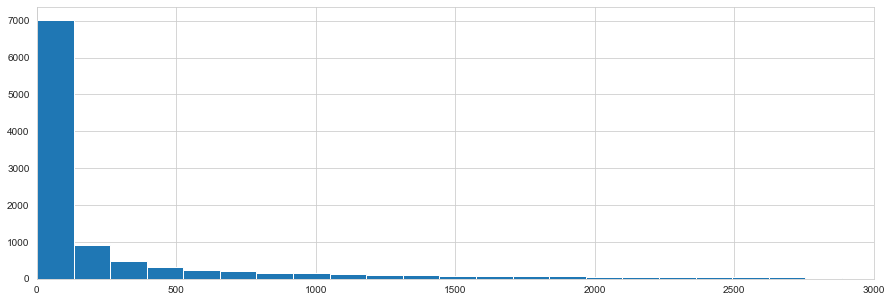

In [9]:
plt.figure(figsize=(15,5))
ratings['num of ratings'].hist(bins=300)
plt.xlim(0,3000)

<AxesSubplot:>

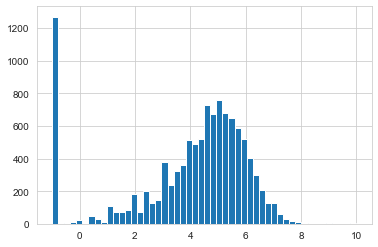

In [10]:
ratings['rating'].hist(bins=50)

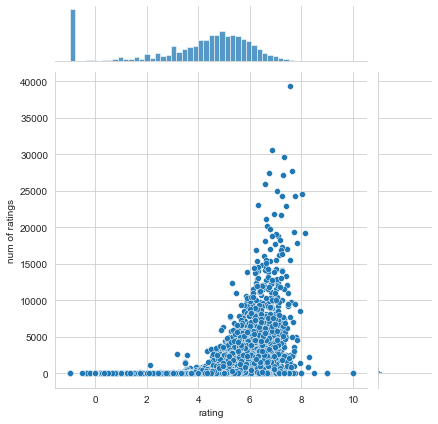

In [11]:
sns.jointplot(x='rating',y='num of ratings',data=ratings)

# genere based

In [12]:
def check_genre(genre_list,string):
    if any(x in string for x in genre_list):
        return True
    else:
        return False
    
def get_recommendation(name):
    #generating list of anime with the same genre with target
    anime_genre = genre_dict.loc[name].values[0].split(', ')
    cols = anime[anime['genre'].apply(
        lambda x: check_genre(anime_genre,str(x)))]['name'].tolist()
    
    #create matrix based on generated list
    animemat = df[df['name'].isin(cols)].pivot_table(
        index='user_id',columns='name',values='rating')
       
    #create correlation table
    anime_user_rating = animemat[name]
    similiar_anime = animemat.corrwith(anime_user_rating)
    corr_anime = pd.DataFrame(similiar_anime,columns=['correlation'])
    corr_anime = corr_anime.join(ratings['num of ratings'])
    corr_anime.dropna(inplace=True)
    corr_anime = corr_anime[corr_anime['num of ratings']>5000].sort_values(
        'correlation',ascending=False)

    return corr_anime.head(10)


In [13]:
get_recommendation('Shingeki no Kyojin')

C:\Users\ACER\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\ACER\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,correlation,num of ratings
name,,
Shingeki no Kyojin,1.000000,29584
Suisei no Gargantia,0.752774,6371
Kami nomi zo Shiru Sekai: Megami-hen,0.750020,5733
Blood Lad,0.741779,8507
Hitsugi no Chaika,0.736769,5168
Maoyuu Maou Yuusha,0.732879,5693
Danganronpa: Kibou no Gakuen to Zetsubou no Koukousei The Animation,0.728270,10082
Magi: The Labyrinth of Magic,0.726442,9907
Psycho-Pass,0.726120,14008


In [14]:
get_recommendation('Naruto')

C:\Users\ACER\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\ACER\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,correlation,num of ratings
name,,
Naruto,1.000000,25925
Bleach,0.720531,12845
InuYasha,0.704638,9328
Shaman King,0.696407,7814
Katekyo Hitman Reborn!,0.694202,6739
Tenjou Tenge,0.691476,5150
Sekirei,0.691413,7924
Rurouni Kenshin: Meiji Kenkaku Romantan,0.690855,7900
Shijou Saikyou no Deshi Kenichi,0.690250,5654


In [19]:
get_recommendation('Sword Art Online')

C:\Users\ACER\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\ACER\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,correlation,num of ratings
name,,
Sword Art Online,1.000000,30583
Sword Art Online II,0.761722,13814
Zero no Tsukaima F,0.727705,7255
Btooom!,0.726417,12082
Accel World,0.726244,10722
Ore no Kanojo to Osananajimi ga Shuraba Sugiru,0.722594,5510
Guilty Crown,0.721473,14568
Mirai Nikki (TV),0.716926,21826
Campione!: Matsurowanu Kamigami to Kamigoroshi no Maou,0.715165,5786
